In [25]:
RED  = '#C82506'
BLUE = '#0365C0'
GREEN = '#00882B'
ORANGE = '#DE6A10'
PURPLE = '#773F9B'
YELLOW = '#DCBD23'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def clean(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
def ca(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', top='off', right='off', left='off',
    labelbottom='off', labelleft='off') # labels along the bottom edge are off
    

def center(ax=None, square=True):
    if ax is None:
        ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom='off', labelleft='off')
    if square:
        ax.set_aspect('equal')

In [26]:
def lagrange(a, l):
    return a**2 + l * (1 - a)

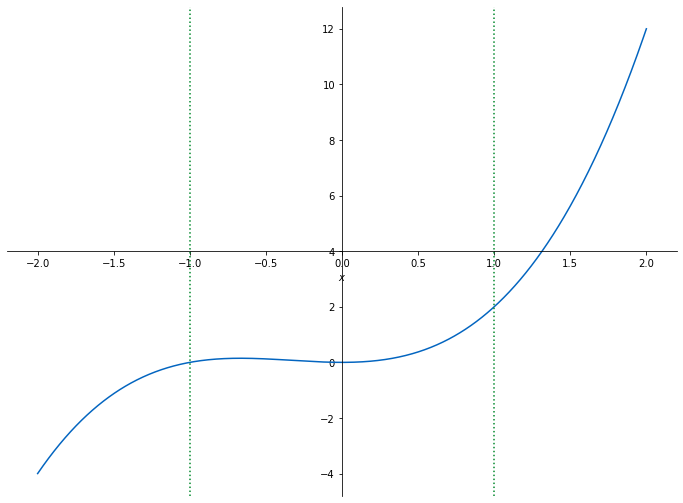

In [32]:
xr = (-2, 2)

h = 1000 # step nums in the mesh
x = np.linspace(xr[0], xr[1], h)

v = x ** 3 + x**2

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
ax.plot(x, v, color=BLUE)
ax.axvline(-1, color=GREEN, linestyle=':')
ax.axvline(1, color=GREEN, linestyle=':')

ax.set_xlabel('$x$')

center(square=False)

plt.savefig('parabola.pdf')

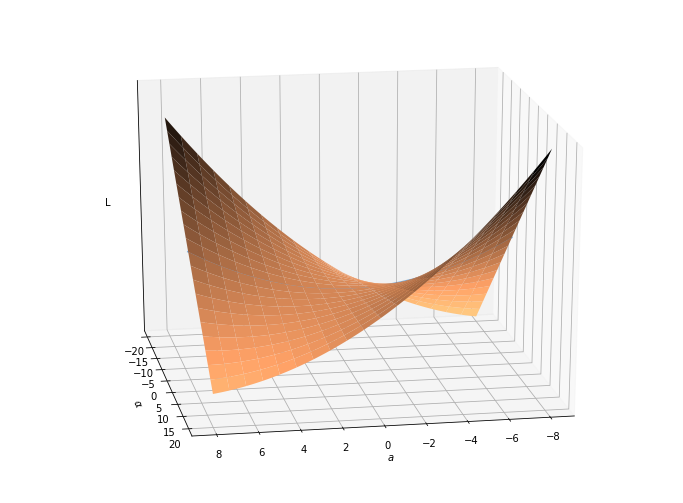

In [33]:
ar = (-8, 8)
lr = (-20, 20)

h = 1000 # step nums in the mesh
aa, ll = np.meshgrid(np.arange(ar[0], ar[1], (ar[1] - ar[0])/h),
                     np.arange(lr[0], lr[1], (lr[1] - lr[0])/h))

values = lagrange(aa.ravel(), ll.ravel())

values = values.reshape(aa.shape)

# 3D plot for good measure

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 80)

ax.plot_surface(aa, ll, values, rstride=50, cstride=50, cmap='copper_r')

a = np.linspace(ar[0], ar[1], 30)
l = np.zeros(30)
v = lagrange(a, l)
ax.plot(a, l, v, color=BLUE, alpha=0.5)


ax.set_xlabel('$a$')
ax.set_ylabel('$\\alpha$')
ax.set_zlabel('L')
                              
ax.set_zticks([])

plt.savefig('lagrange surface.pdf')


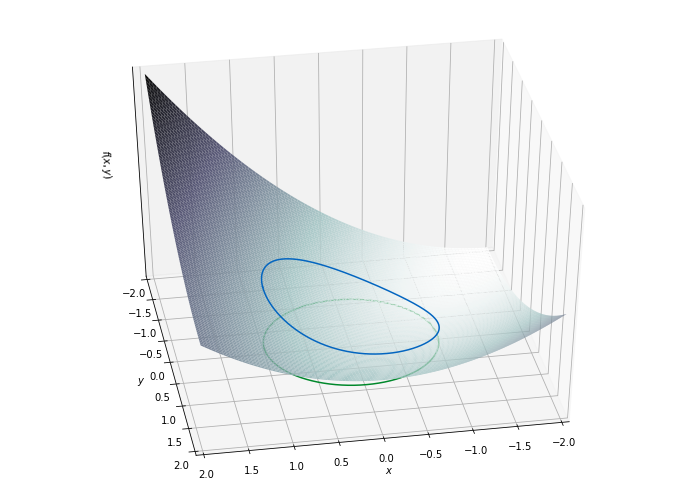

In [85]:
import math

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 80)

EPS = 0.1
myfunction = lambda x, y : x**2 + 0.5 * y**2 -x * y + 2*x + 2

xr = (-2, 2)
yr = (-2, 2)

t = np.linspace(0, 2 * math.pi, 720)
x = np.cos(t)
y = np.sin(t)
v = np.zeros(*t.shape)

ax.plot(x, y, v+EPS, color=GREEN, zorder=0)


h = 100 # step nums in the mesh
xx, yy = np.meshgrid(np.arange(xr[0], xr[1], (xr[1] - xr[0])/h),
                     np.arange(yr[0], yr[1], (yr[1] - yr[0])/h))

values = myfunction(xx.ravel(), yy.ravel())

values = values.reshape(xx.shape)

# 3D plot for good measure

ax.set_xlim(xr[0], xr[1])
ax.set_ylim(yr[0], yr[1])
ax.set_zlim(0, values.max())

plt.savefig('const-domain.pdf')

ax.plot_surface(xx, yy, values, rstride=1, cstride=1, cmap='bone_r',  alpha=0.95, zorder=0)

plt.savefig('const-surf.pdf')

t = np.linspace(0, 2 * math.pi, 720)
x = np.cos(t)
y = np.sin(t)
v = myfunction(x, y)
ax.plot(x, y, v+EPS, color=BLUE, zorder = 100)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')
                              
ax.set_zticks([])

plt.savefig('const-proj.pdf')


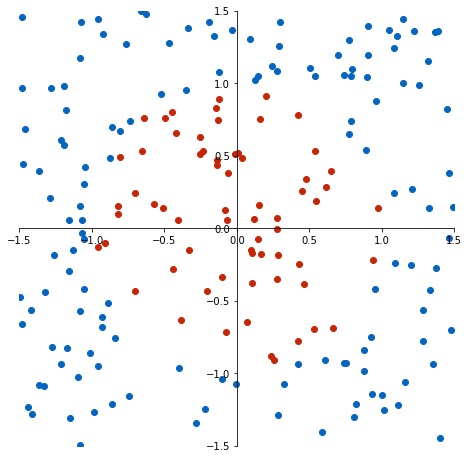

In [58]:
n = 200
x = np.random.rand(n, 2)* 3.0 - 1.5 
y = np.sign(np.sqrt(x[:, 0]**2 + x[:, 1]**2) - 1.0)

xp = x[y < 0]
xn = x[y > 0]

plt.figure(figsize=(8, 8))

plt.scatter(xp[:, 0], xp[:,1], color=RED)
plt.scatter(xn[:, 0], xn[:,1], color=BLUE)

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))

clean()
center()

plt.savefig('circle-noisy overfitting.pdf')

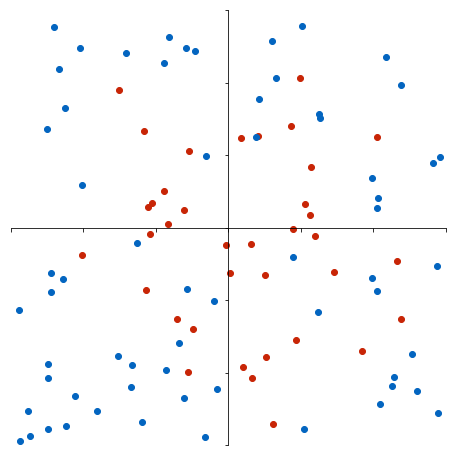

In [5]:
n = 100
sig = 0.3

x = np.random.rand(n, 2)* 3.0 - 1.5 
y = np.sign((x[:, 0] + (np.random.randn(n) * sig))**2 + (x[:, 1] + (np.random.randn(n) * sig))** 2  - 1.0)

xtest = np.random.rand(n, 2)* 3.0 - 1.5 
ytest = np.sign((x[:, 0] + (np.random.randn(n) * sig))**2 + (x[:, 1] + (np.random.randn(n) *sig))** 2  - 1.0)

xp = x[y < 0]
xn = x[y > 0]

xtestp = xtest[ytest < 0]
xtestn = xtest[ytest > 0]

plt.figure(figsize=(8, 8))

plt.scatter(xp[:, 0], xp[:,1], color=RED)
plt.scatter(xn[:, 0], xn[:,1], color=BLUE)

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))

clean()
center()

plt.savefig('circle-noisy.pdf')

(100, 231)


/Users/Peter/anaconda/envs/pytorch4/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


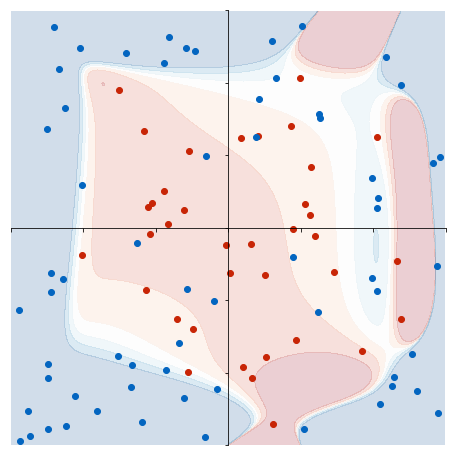

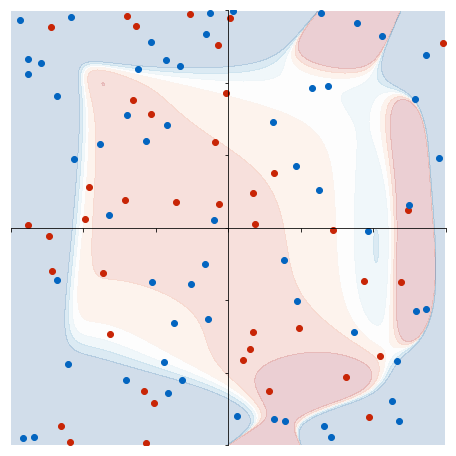

In [6]:
# from sklearn.svm import SVC
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.plotting import plot_decision_regions

poly = PolynomialFeatures(20)

# xplus = np.column_stack((x[:, 0], x[:, 1], x[:,0]**2, x[:,1]**2, x[:,0] * x[:,1]))
xplus = poly.fit_transform(x)

print(xplus.shape)

lin = LogisticRegression()
lin.fit(xplus, y)

h = 500 # step nums in the mesh

a_min, a_max = -1.5, 1.5
h_min, h_max = -1.5, 1.5

xx, yy = np.meshgrid(np.arange(a_min, a_max, (a_max - a_min)/h),
                     np.arange(h_min, h_max, (h_max - h_min)/h))

xr = xx.ravel()
yr = yy.ravel() 

# xyplus = xplus = np.column_stack((xr, yr, xr**2, yr**2, xr*yr))
xyplus = poly.fit_transform(np.column_stack((xr, yr)))

zz = 1 - lin.predict_proba(xyplus)
zz = zz[:,0]
zz = zz.reshape(xx.shape)

plt.figure(figsize=(8, 8))

plt.contourf(xx, yy, zz, cmap='RdBu', alpha=0.2)
plt.scatter(xp[:, 0], xp[:,1], color=RED)
plt.scatter(xn[:, 0], xn[:,1], color=BLUE)

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))

clean()
center()

plt.savefig('circle-overfit-trainset.pdf')

plt.figure(figsize=(8, 8))

plt.contourf(xx, yy, zz, cmap='RdBu', alpha=0.2)
plt.scatter(xtestp[:, 0], xtestp[:,1], color=RED)
plt.scatter(xtestn[:, 0], xtestn[:,1], color=BLUE)

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))

clean()
center()

plt.savefig('circle-overfit-testset.pdf')

(100, 2)


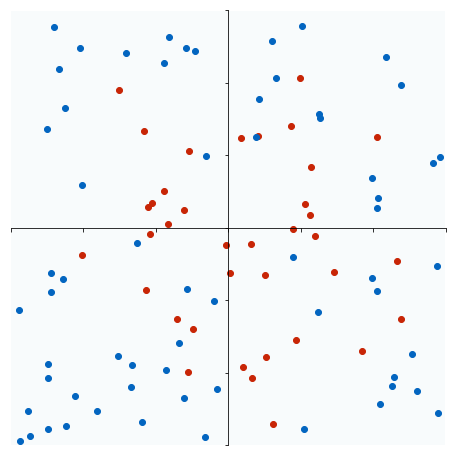

In [7]:
# from sklearn.svm import SVC
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.plotting import plot_decision_regions


# xplus = np.column_stack((x[:, 0], x[:, 1], x[:,0]**2, x[:,1]**2, x[:,0] * x[:,1]))

print(x.shape)

lin = SVC(kernel='rbf', gamma=0.1)
lin.fit(x, y)

h = 500 # step nums in the mesh

a_min, a_max = -1.5, 1.5
h_min, h_max = -1.5, 1.5

xx, yy = np.meshgrid(np.arange(a_min, a_max, (a_max - a_min)/h),
                     np.arange(h_min, h_max, (h_max - h_min)/h))

xr = xx.ravel()
yr = yy.ravel() 

# xyplus = xplus = np.column_stack((xr, yr, xr**2, yr**2, xr*yr))
# xyplus = poly.fit_transform(np.column_stack((xr, yr)))
xyplus = np.column_stack((xr, yr))

zz = lin.predict(xyplus)
# zz = zz[:,0]
zz = zz.reshape(xx.shape)

plt.figure(figsize=(8, 8))

plt.contourf(xx, yy, zz, cmap='RdBu', alpha=0.2)
plt.scatter(xp[:, 0], xp[:,1], color=RED)
plt.scatter(xn[:, 0], xn[:,1], color=BLUE)

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))

clean()
center()

plt.savefig('circle-solved.pdf')

In [8]:
from sklearn.svm import SVC

lin = SVC(kernel='rbf', gamma=0.1, C=10)
lin.fit(x, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

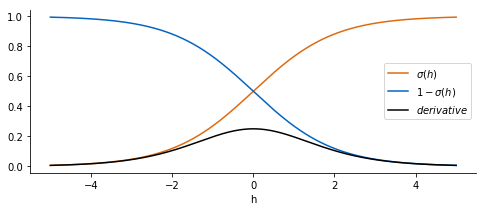

In [16]:
def sigmoid(x):
   return 1.0/(1 + np.exp(- x))     

plt.figure(figsize=(8, 3))

x = np.linspace(-5, 5, 1000)
plt.plot(x, sigmoid(x), color=ORANGE, label='$\sigma(h)$')
plt.plot(x, 1 - sigmoid(x), color=BLUE, label='$1 - \sigma(h)$')
plt.plot(x, sigmoid(x) * (1 - sigmoid(x)), color='k', label='$derivative$')

clean()
plt.legend()
plt.xlabel('h')

plt.savefig('sigmoid-derivative.pdf')

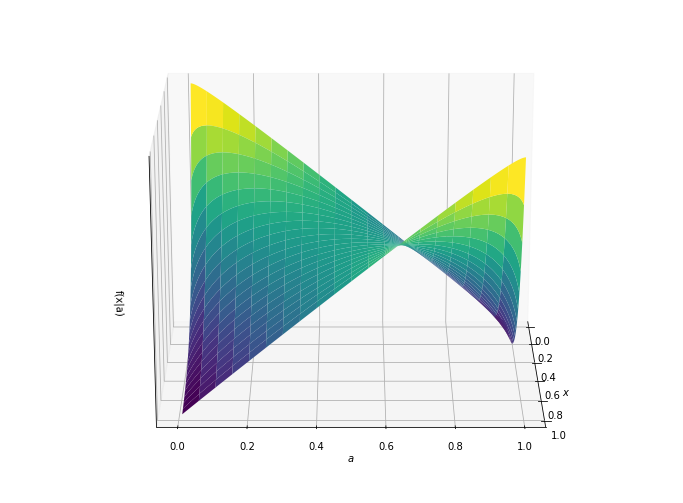

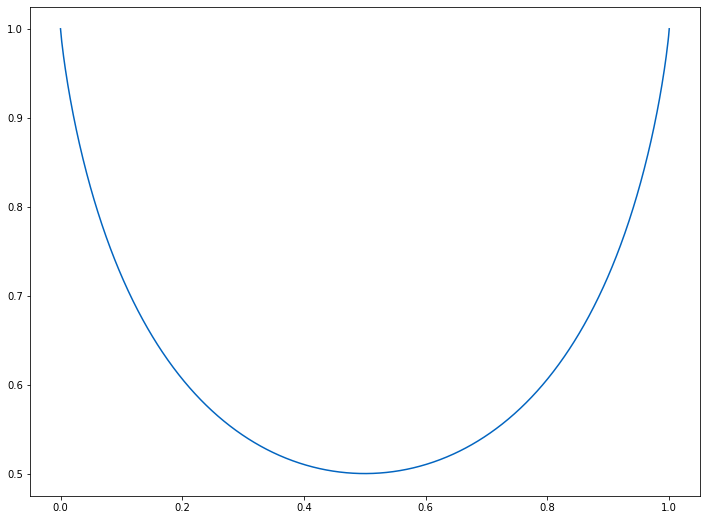

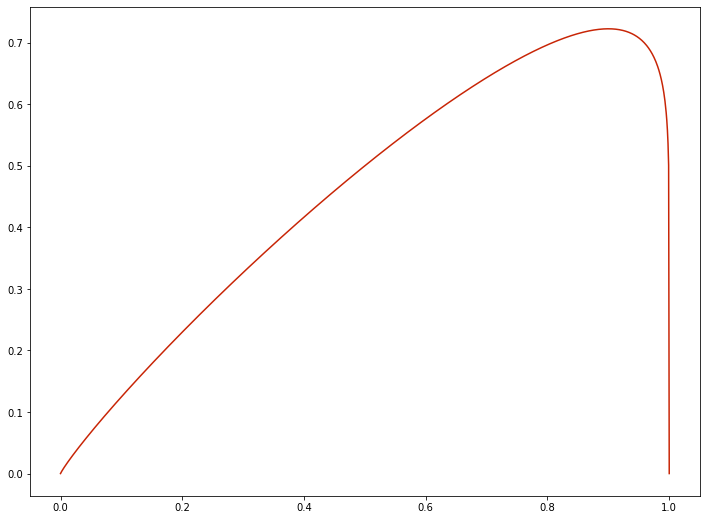

In [122]:
# https://www.wolframalpha.com/input/?i=integral+of+f%28x%29+%3D+a%5Ex+*+%281-a%29+%5E+%281-x%29+from+0+to+1

#Z = lambda a: (2.0* np.arctanh(1.0 - 2.0 * a))/(1.0-2.0*a)
f = lambda x, a: (a ** x * (1-a) ** (1-x)) # * Z(a)
# f = lambda x, a: - x * np.log(a) - (1-x) * np.log(1-a)

xr = (0.01, .99)
ar = (0.01, .99)

h = 1000 # step nums in the mesh
xx, aa = np.meshgrid(np.arange(xr[0], xr[1], (xr[1] - xr[0])/h),
                     np.arange(ar[0], ar[1], (ar[1] - ar[0])/h))

values = f(xx.ravel(), aa.ravel())

values = values.reshape(xx.shape)

# 3D plot for good measure

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 0)

ax.plot_surface(xx, aa, values, rstride=50, cstride=50, cmap='viridis')

ax.set_xlabel('$x$')
ax.set_ylabel('$a$')
ax.set_zlabel('f(x|a)')
                              
ax.set_zticks([])

plt.savefig('xent.pdf')


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

xa = np.linspace(0, 1, h)
ax.plot(xa, f(xa, xa), color=BLUE)

plt.savefig('xent-diagonal.pdf')


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

x = np.zeros(h) + 0.9
a = np.linspace(0, 1, h)

ax.plot(a, f(x, a), color=RED)

plt.savefig('xent-halfway.pdf')


/Users/Peter/anaconda/envs/pytorch4/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


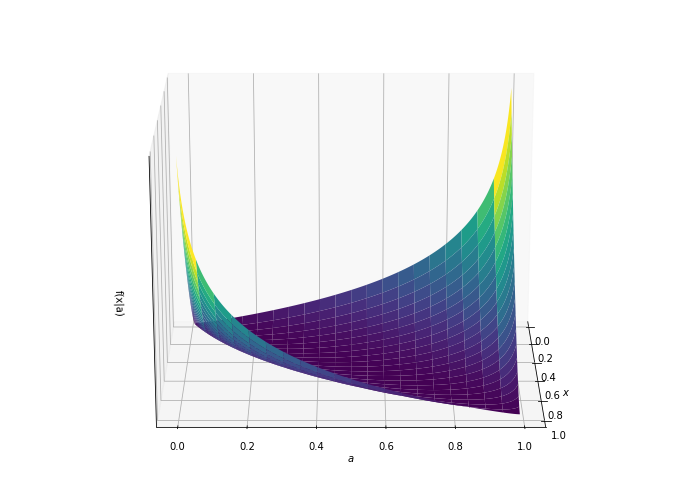

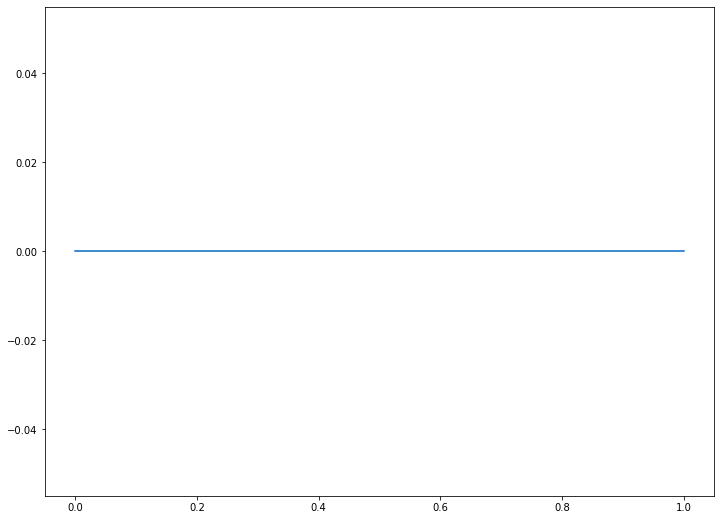

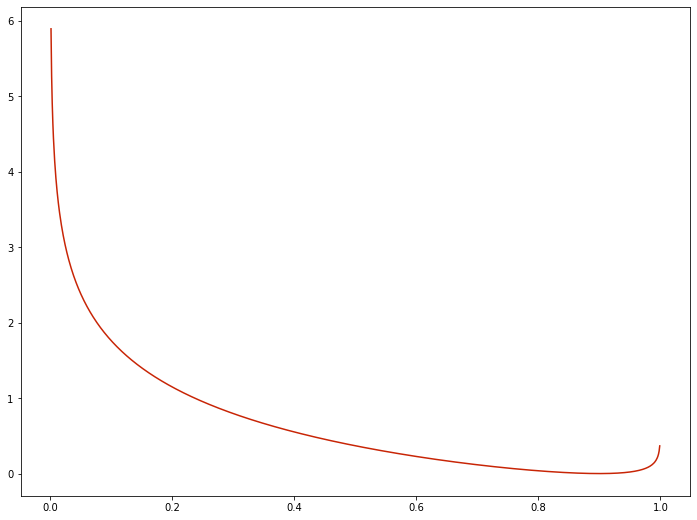

In [119]:
# https://www.wolframalpha.com/input/?i=integral+of+f%28x%29+%3D+a%5Ex+*+%281-a%29+%5E+%281-x%29+from+0+to+1

#Z = lambda a: (2.0* np.arctanh(1.0 - 2.0 * a))/(1.0-2.0*a)
f = lambda x, a: - np.log((a ** x * (1-a) ** (1-x))/(x ** x * (1-x) ** (1-x))) # * Z(a)
# f = lambda x, a: - x * np.log(a) - (1-x) * np.log(1-a)

xr = (0.01, .99)
ar = (0.01, .99)

h = 1000 # step nums in the mesh
xx, aa = np.meshgrid(np.arange(xr[0], xr[1], (xr[1] - xr[0])/h),
                     np.arange(ar[0], ar[1], (ar[1] - ar[0])/h))

values = f(xx.ravel(), aa.ravel())

values = values.reshape(xx.shape)

# 3D plot for good measure

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 0)

ax.plot_surface(xx, aa, values, rstride=50, cstride=50, cmap='viridis')

ax.set_xlabel('$x$')
ax.set_ylabel('$a$')
ax.set_zlabel('f(x|a)')
                              
ax.set_zticks([])

plt.savefig('kl.pdf')


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

xa = np.linspace(0, 1, h)
ax.plot(xa, f(xa, xa), color=BLUE)

plt.savefig('kl-diagonal.pdf')


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

x = np.zeros(h) + 0.9
a = np.linspace(0, 1, h)

ax.plot(a, f(x, a), color=RED)

plt.savefig('kl-halfway.pdf')


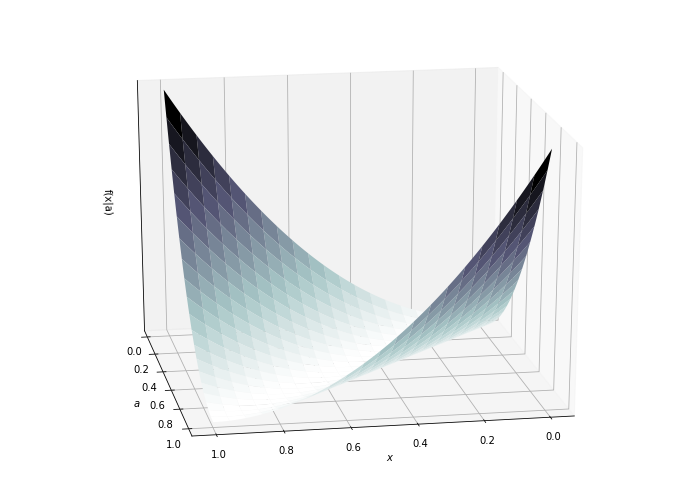

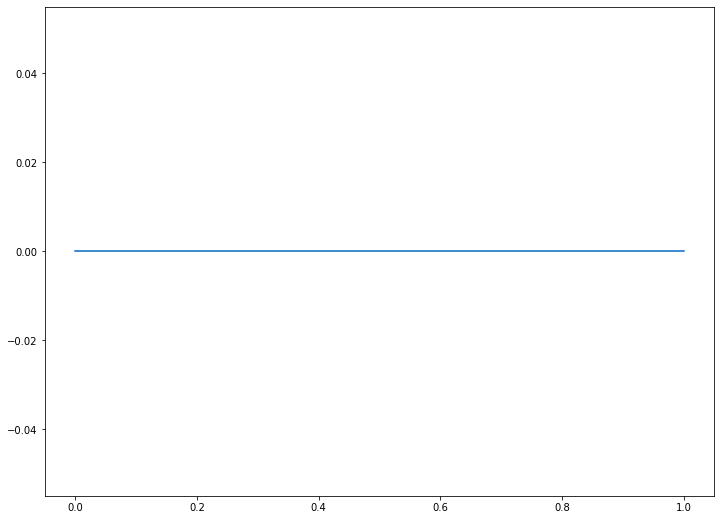

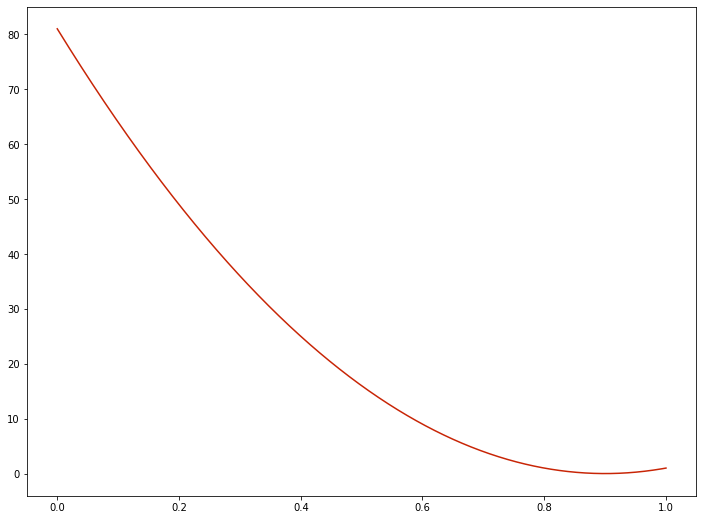

In [125]:
f = lambda x, a: - np.log(np.exp(- ((x - a) ** 2)/(0.01)))

xr = (0, 1)
ar = (0, 1)

h = 1000 # step nums in the mesh
xx, aa = np.meshgrid(np.arange(xr[0], xr[1], (xr[1] - xr[0])/h),
                     np.arange(ar[0], ar[1], (ar[1] - ar[0])/h))

values = f(xx.ravel(), aa.ravel())

values = values.reshape(xx.shape)

# 3D plot for good measure

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 80)

ax.plot_surface(xx, aa, values, rstride=50, cstride=50, cmap='bone_r')

ax.set_xlabel('$x$')
ax.set_ylabel('$a$')
ax.set_zlabel('f(x|a)')
                              
ax.set_zticks([])

plt.savefig('gauss.pdf')


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

xa = np.linspace(0, 1, h)
ax.plot(xa, f(xa, xa), color=BLUE)

plt.savefig('gauss-diagonal.pdf')

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

x = np.zeros(h) + 0.9
a = np.linspace(0, 1, h)

ax.plot(a, f(x, a), color=RED)

plt.savefig('gauss-halfway.pdf')

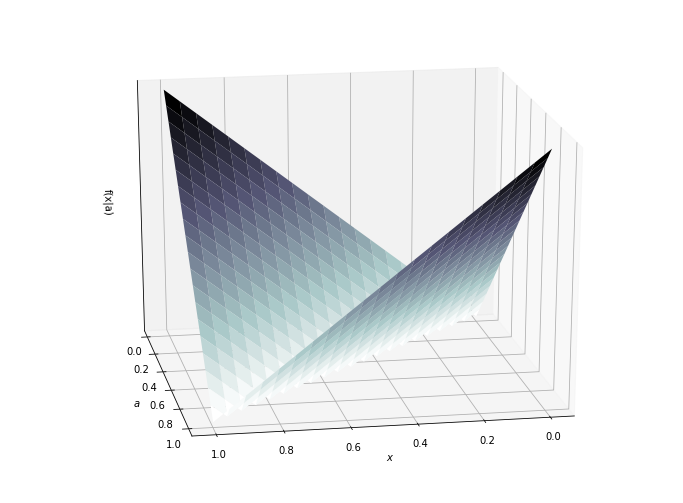

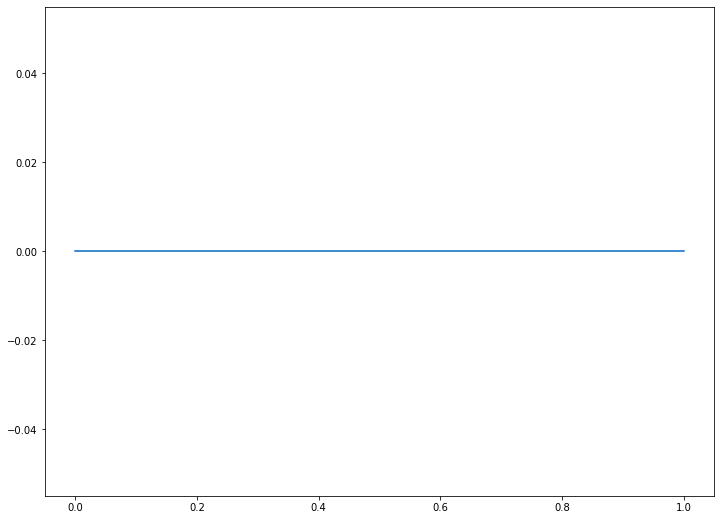

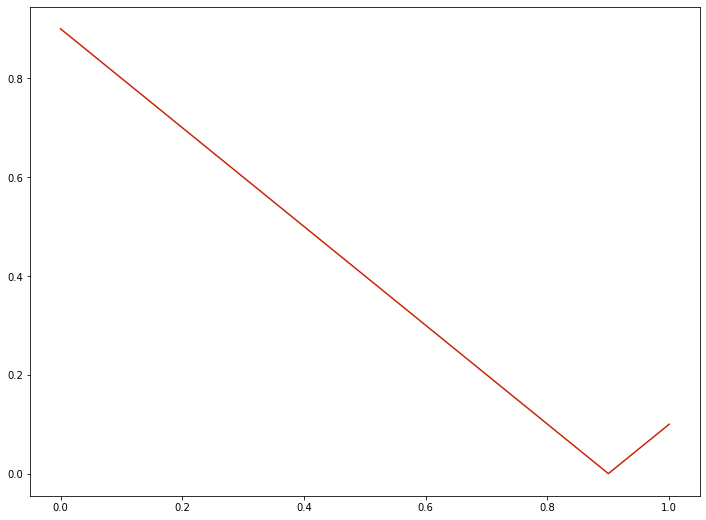

In [121]:
f = lambda x, a: - np.log(np.exp(- np.abs((x - a))))

xr = (0, 1)
ar = (0, 1)

h = 1000 # step nums in the mesh
xx, aa = np.meshgrid(np.arange(xr[0], xr[1], (xr[1] - xr[0])/h),
                     np.arange(ar[0], ar[1], (ar[1] - ar[0])/h))

values = f(xx.ravel(), aa.ravel())

values = values.reshape(xx.shape)

# 3D plot for good measure

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 80)

ax.plot_surface(xx, aa, values, rstride=50, cstride=50, cmap='bone_r')

ax.set_xlabel('$x$')
ax.set_ylabel('$a$')
ax.set_zlabel('f(x|a)')
                              
ax.set_zticks([])

plt.savefig('abs.pdf')


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

xa = np.linspace(0, 1, h)
ax.plot(xa, f(xa, xa), color=BLUE)

plt.savefig('abs-diagonal.pdf')


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

x = np.zeros(h) + 0.9
a = np.linspace(0, 1, h)

ax.plot(a, f(x, a), color=RED)

plt.savefig('abs-halfway.pdf')